## **Integrating Magnetic Field Over a Wire**

Often in physics we are interested in solving integrals. However, many integrals are not solvable by hand, so instead we use numerical techinques to approximate them. In this notebook, we will solve the problem described below (a past midterm problem!) using python. As you'll see, the problem is actually not too difficult to solve by hand so we can check our approximation, but it's a nice and hopefully simple example of how we can computationally estimate integrals.

---

### The Problem:

A wire lying on the $x$-axis from $x = 0$ to $x = 1$ m carries a current of $I = 3$ Amps in the positive $x$ direction. The wire is immersed in a **non-uniform** magnetic field given by: \
\
\begin{equation}
   \vec{B}(x,y) = (3.0\; Tm^{-2})x^2\hat{i}\;  - \;(1.0\;Tm^{-2})x^2\hat{j}
\end{equation}




\
Find the magnitude and direction of the force on the wire segment. Express the magnitude as a decimal number with units and express the direction in unit vector notation.







---

As with any physics problem, it always helps to draw a picture first. We will import numpy and matplot in order to do this in python. These are standard libraries for performing computations in physics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

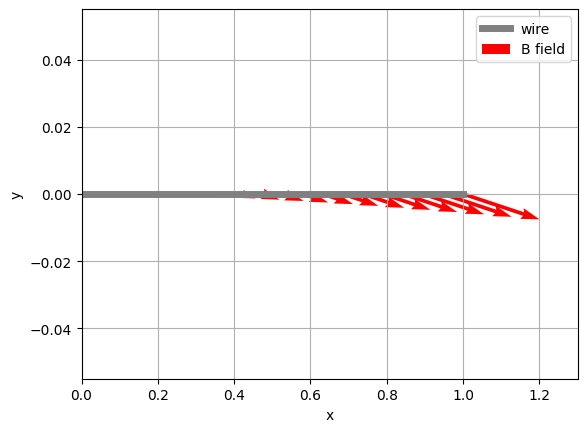

In [ ]:
x = np.linspace(0,1,1000)
y = np.zeros_like(x)

x1= np.linspace(0,1,20)
y1= np.zeros_like(x1)

plt.plot(x, y, color = 'grey', linewidth = 5, label = "wire")
plt.quiver(x1,y1,3*x1**2, -1*x1**2, color = 'red', label = "B field")
plt.xlim(0,1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Now that we have an idea of what the problem looks like, let's start to think about what equations we will use and the integration to perform. The most relevant equation is: \n
\
\begin{equation}
   \vec{F} = I\vec{L} \times \vec{B}
\end{equation}

\
Which will be more useful to us in differential form since the magnetic field is not constant along the wire: \

\
\begin{equation}
   d\vec{F} = Id\vec{L} \times \vec{B}
\end{equation}

Our task is to sum up the infinitesimal forces on each segment of the wrie to find the net force on the wire. There are two ways we can do this. The easy way is to import a library that will do the sum for us - this is what is done below. The other way is to use a for loop and implement the sum ourselves. See if you can implement this second way on your own (there is starter code below)!  \

\
**If you do try to implement the second method, try to change the parameter dx to see how the estimate changes!

In [ ]:
def dF(x):
  """
  vector valued function that returns dF at x
  """
  I = 3
  return I * (np.cross([1,0,0], [3*x**2,-1*x**2,0]))

"""
Note that in reality, dL=[dx,0,0] since it's only in the x direction, but we used [1,0,0].
This is because integrate.quad_vec() only needs the integrand. To give it only the integrand,
we set dx=1.

Think of manually computing the cross product [dx,0,0] x [a,b,c]. You
are going to get [0,0,bdx]. Now you want to integrate it, so you have to give quad_vec
the integrand, which is b (for the z direction). So when we do an integration like
this with quad_vec, we set dx to 1.

When you do the integration manually, then having dx be small is necessary because
you are the one computing the Riemann sum (or whatever finite integration scheme you are using)
"""

In [ ]:
import scipy.integrate as integrate

In [ ]:
#METHOD 1 - SCIPY Integration

integrate.quad_vec(dF, 0, 1)

(array([ 0.,  0., -1.]), 3.33066907387547e-14)

In [ ]:
#METHOD 2 - For loop

I = 3
dx = 0.001  # <--- change this parameter to see how your estimate changes

#(x,y) coordinates along the wire
x = np.linspace(0,1,int(1/dx))
y = np.zeros_like(x)

#initiaze F to zero vector
F = np.array([0.0,0.0,0.0])


###YOUR CODE HERE (for loop)





print(F)

[0. 0. 0.]


Here is an example of what the for loop could have looked like:


```
for i in range(int(1/dx)):
  F += I * (np.cross([dx,0,0],[3*x[i]**2,-1*x[i]**2,0]))

```



---

Now we will solve the problem by hand to verify our estimate -

\begin{equation}
   d\vec{F} = Id\vec{L}\; \times \; \vec{B}
\end{equation}


\begin{equation}
   d\vec{L}=\; dx \; \hat{i}
\end{equation}

\
\begin{equation}
   d\vec{L}\;\times\; \vec{B} =
   \begin{vmatrix}
    i & j  & k  \\
    dx  & 0  & 0 \\
    B_x & B_y & 0 \\
  \end{vmatrix}
\end{equation}


\begin{equation}
   =\; 0i \; + \;0j -(x^2dx) \; k
\end{equation}

\
\begin{equation}
   F⃗= 3 \int_{0}^{1} -x^2 \,dx \, \hat{k}
\end{equation}
\begin{equation}
   F⃗= -3 \; \left[\frac{x^3}{3}\right]_0^1 \; \hat{k}
\end{equation}
\
\begin{equation}
   F⃗= -1 \;N \;\hat{k}
\end{equation}


So we can see that our computational integration gave us the right answer! This problem specifically was not too hard to do by hand, so you probably would not go through the trouble of writing code to do the integral for you. However, you can imagine a slight variation of this problem (imagine the wire was curvy) would be much easier to do in python.


